# Лабораторная работа 3.2.2. Резонанс напряжений

In [1]:
import numpy as np
import pandas as pd
import smartlab as sl
from IPython.display import Image

## Теория

В первой части рассматривается контур с импедансом $Z_L = r_L + i\Omega L$ <br/>
Из этого можно посчитать связи эффективных значений напряжений на элементах и тока в цепи:
$$ U_R = IR,\qquad \tan{\psi_1}=0\qquad (1) $$
$$ U_L = I\sqrt{r_L^2+(\Omega L)^2},\qquad \tan{\psi_2}=\dfrac{\Omega L}{r_L}\qquad (2) $$
$$ U_{R+L} = I\sqrt{(R+r_L)^2+(\Omega L)^2},\qquad \tan{\psi_3}=\dfrac{\Omega L}{R+r_L}\qquad (3) $$
<br/>
Средняя мощность, выделяющаяся в катушке, равна $P_L=I^2 r_L$

## Часть 1

Снимем зависимость всех величин от $x$

In [2]:
raw_data = pd.read_csv('data.tsv', delimiter='\t')
raw_data

,"$x,\ мм$","$I,\ дел$","$U_R,\ дел$","$U_{R+L},\ дел$","$U_L,\ дел$","$P_L,\ дел$"
0,5,32.5,75.0,116.0,78.0,46.0
1,7,35.5,81.0,114.0,69.0,41.0
2,9,37.0,85.0,113.0,63.5,39.0
3,10,38.0,86.0,112.0,61.0,37.0
4,11,38.0,87.5,111.5,58.0,36.5
5,12,39.0,89.0,111.0,56.0,35.0
6,14,39.5,90.5,110.5,53.0,33.5
7,16,40.0,91.5,110.0,50.0,32.0
8,18,40.5,93.0,110.0,47.0,31.0
9,20,42.0,94.0,109.5,45.0,29.5


Погрешность $\Delta x = 0.5 мм$, для остальных измерений - 0.5 дел

Выпишем все пределы измерений:

- Для напряжения: 150 дел = 150 В
- Для тока: 100 дел = 2.5 А
- Для мощности: 100 дел = 25 Вт

$\nu=50\ Гц \Rightarrow \Omega = 2\pi\nu = 314\ рад/с$

Таким образом, погрешности:
- $\Delta I = 0.01\ А$
- $\Delta U = 0.5\ В$
- $\Delta P = 0.1\ Вт$

Пересчитаем снятые данные в СИ и вычислим значения $r_L$ и $L$

In [3]:
data = pd.DataFrame()
data['$x,\ мм$'] = raw_data.iloc[:,0]
data['$I,\ А$'] = round(raw_data.iloc[:,1]*0.025, 2)
data['$U_R,\ В$'] = raw_data.iloc[:,2]
data['$U_{R+L},\ В$'] = raw_data.iloc[:,3]
data['$U_L,\ В$'] = raw_data.iloc[:,4]
data['$P_L,\ Вт$'] = round(raw_data.iloc[:,5]*0.25, 1)
data['$r_L,\ Ом$'] = round(data['$P_L,\ Вт$']/(data['$I,\ А$'] ** 2), 1)
data['$L,\ Гн$'] = round(1/314*((data['$U_{R+L},\ В$']/data['$I,\ А$']) ** 2 - data['$r_L,\ Ом$'] ** 2) ** 0.5, 2)
data['$\Delta r_L,\ Ом$'] = round((0.1/data['$P_L,\ Вт$'] + 0.02/data['$I,\ А$'])*data['$r_L,\ Ом$'], 1)
data['$\Delta L,\ Гн$'] = round((0.1/data['$P_L,\ Вт$'] + 0.02/data['$I,\ А$'])*data['$L,\ Гн$'], 2)
data

,"$x,\ мм$","$I,\ А$","$U_R,\ В$","$U_{R+L},\ В$","$U_L,\ В$","$P_L,\ Вт$","$r_L,\ Ом$","$L,\ Гн$","$\Delta r_L,\ Ом$","$\Delta L,\ Гн$"
0,5,0.81,75.0,116.0,78.0,11.5,17.5,0.45,0.6,0.02
1,7,0.89,81.0,114.0,69.0,10.2,12.9,0.41,0.4,0.01
2,9,0.92,85.0,113.0,63.5,9.8,11.6,0.39,0.4,0.01
3,10,0.95,86.0,112.0,61.0,9.2,10.2,0.37,0.3,0.01
4,11,0.95,87.5,111.5,58.0,9.1,10.1,0.37,0.3,0.01
5,12,0.98,89.0,111.0,56.0,8.8,9.2,0.36,0.3,0.01
6,14,0.99,90.5,110.5,53.0,8.4,8.6,0.35,0.3,0.01
7,16,1.00,91.5,110.0,50.0,8.0,8.0,0.35,0.3,0.01
8,18,1.01,93.0,110.0,47.0,7.8,7.6,0.35,0.2,0.01
9,20,1.05,94.0,109.5,45.0,7.4,6.7,0.33,0.2,0.01


Построим графики зависимостей $r_L(x)$ и $L(x)$

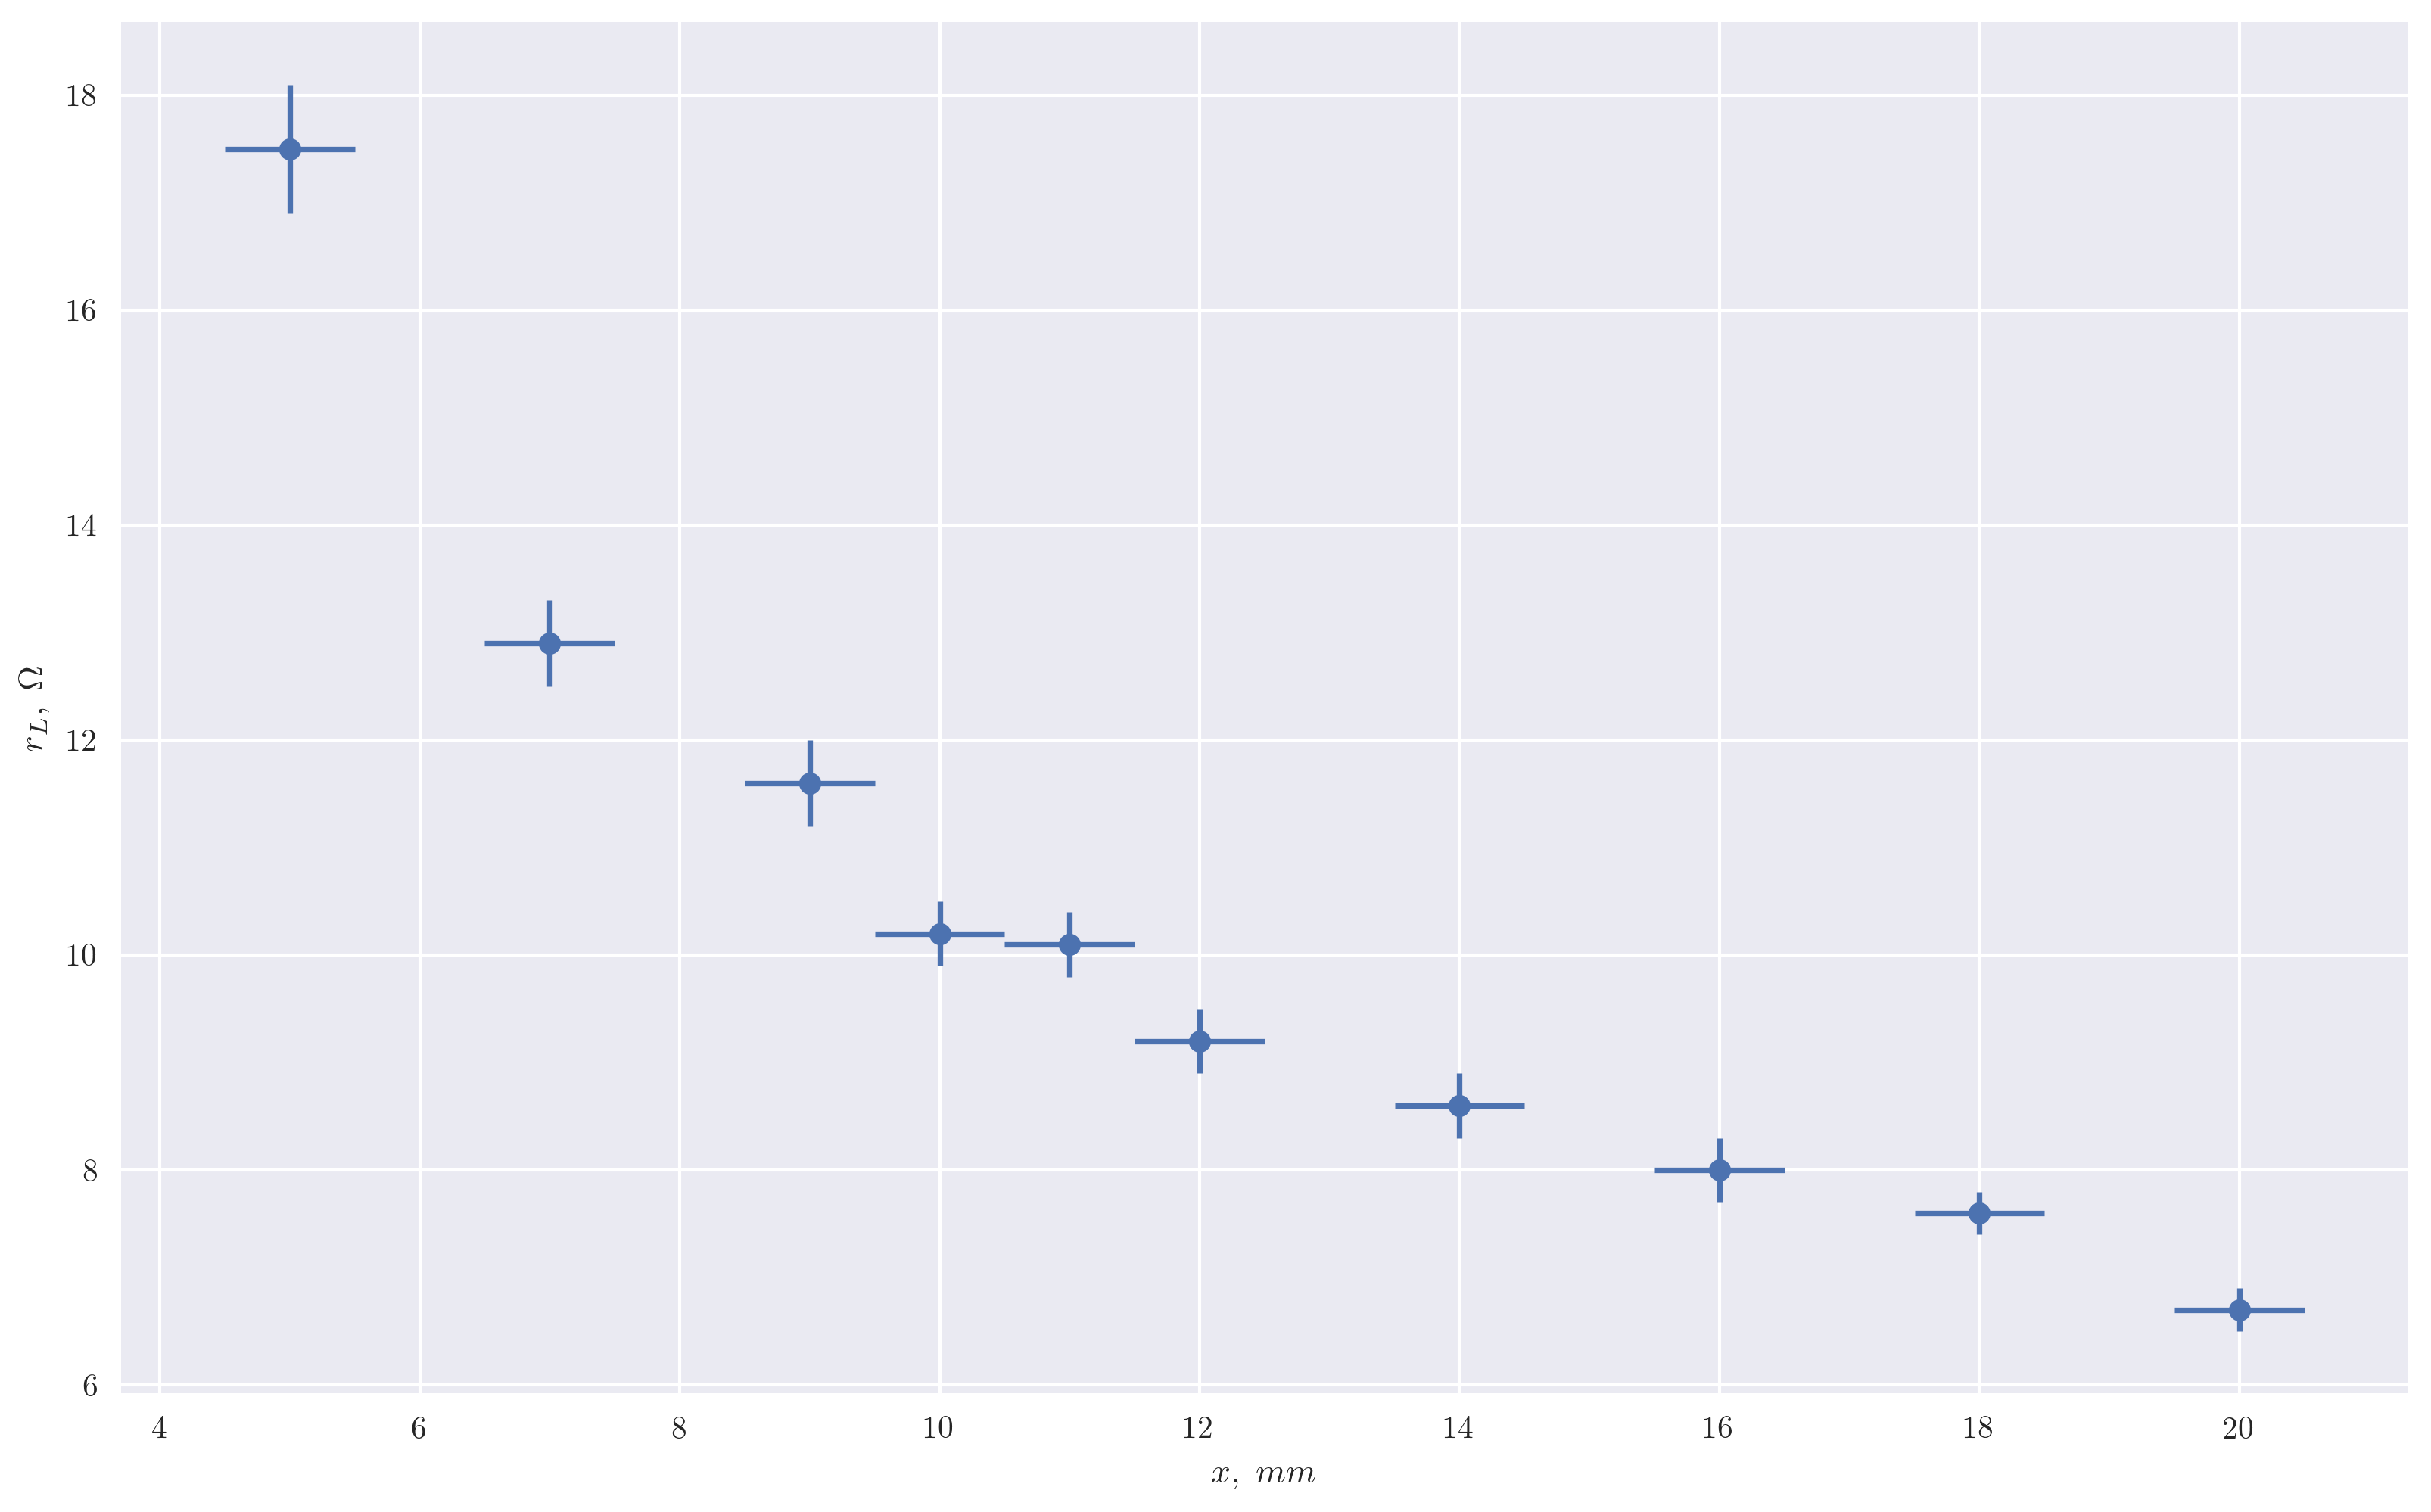

In [4]:
sl.dotplot(x=data['$x,\ мм$'], y=data['$r_L,\ Ом$'], xerr=sl.abserror(0.5, data['$x,\ мм$']),
          yerr=data['$\Delta r_L,\ Ом$'], xlabel='$x,\ mm$', ylabel='$r_L,\ \Omega$')

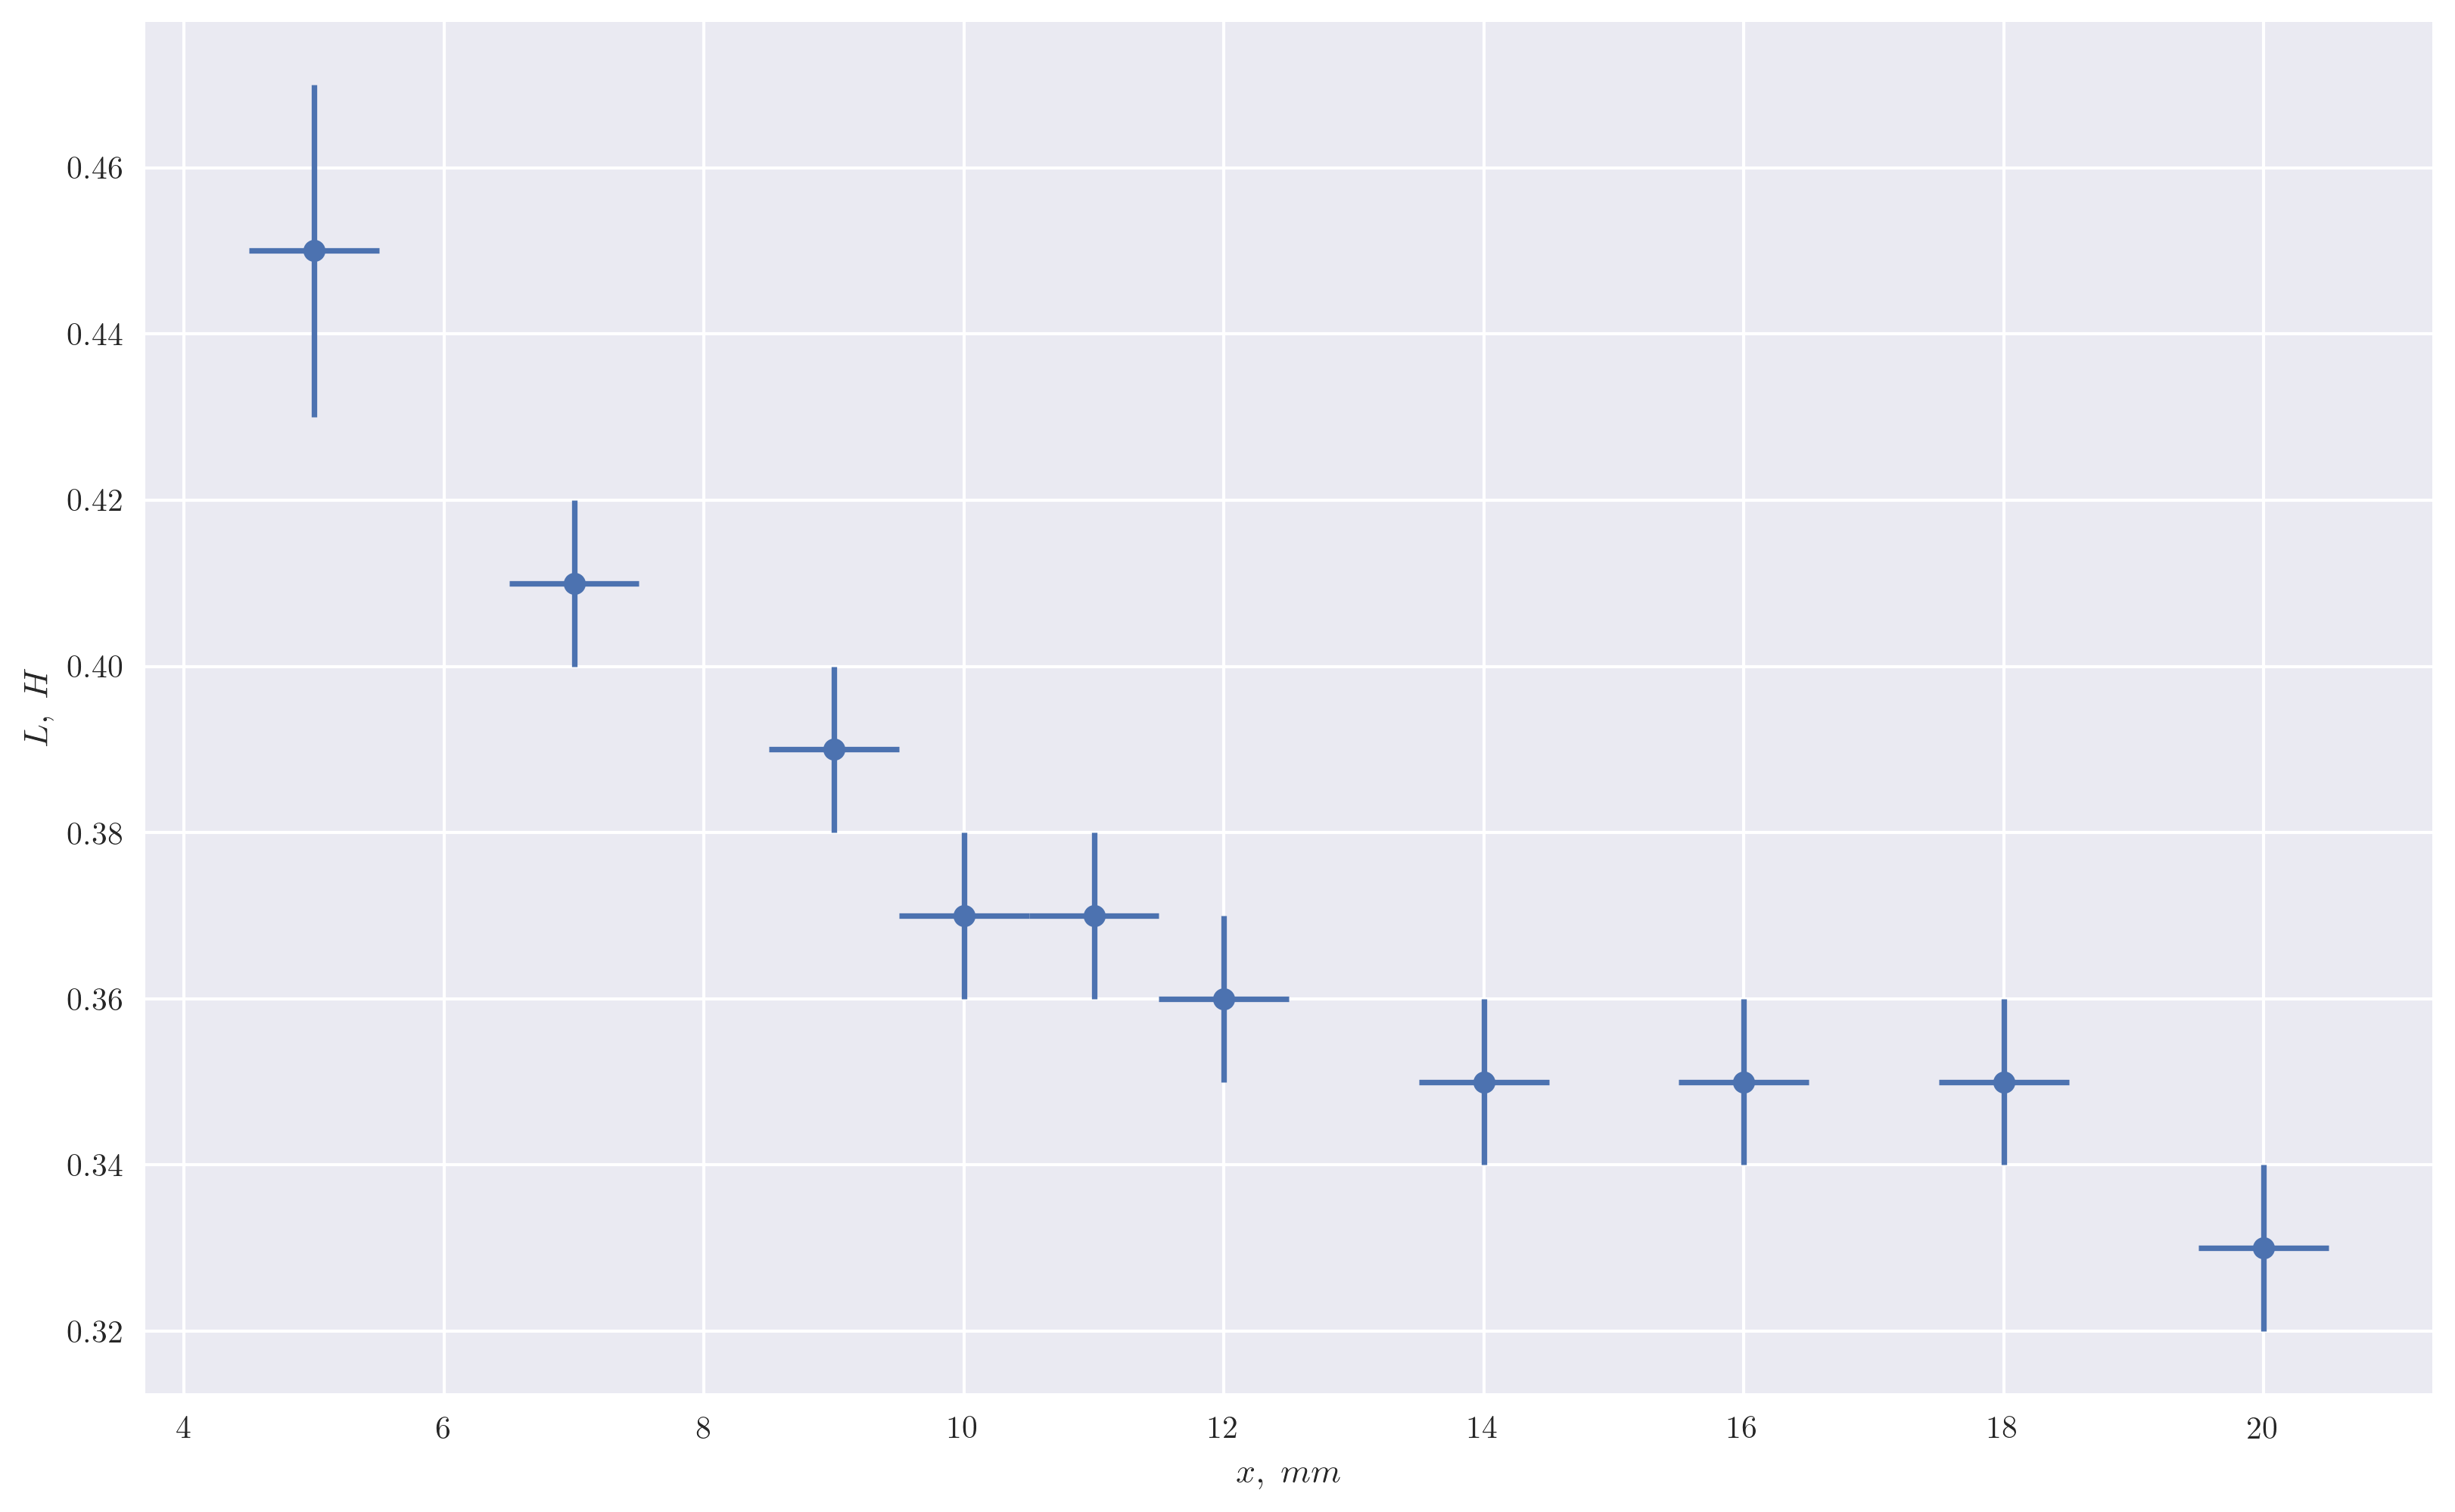

In [5]:
sl.dotplot(data['$x,\ мм$'], data['$L,\ Гн$'], xerr=sl.abserror(0.5, data['$x,\ мм$']), 
           yerr=data['$\Delta L,\ Гн$'], xlabel='$x,\ mm$', ylabel='$L,\ H$')

Среднее положение сердечника при $x=10\ см \Rightarrow r_L=(10.5\pm0.5)\ Ом;\quad L=(0.37\pm 0.01)\ Гн$

## Часть 2

Используемые диапазоны:
- $U_{\Sigma}$: 150 дел = 150 В
- $U_C$: 150 дел = 600 В
- $I$: 100 дел = 5 А

В резонансе:
- $U_{\Sigma}$ = 44 дел = 44 В
- $U_C$ = 80.5 дел = 322 В
- $I$ = 66 дел = 3.3 А
- $x$ = 20 мм
- $C$ = 33 мкФ - вносит наибольшую погрешность ($\Delta C\approx 2\ мкФ$)
- $R_2$ = 5.6 Ом

Добротность $Q=\dfrac{U_C}{U_{\Sigma}}=7.3$

Резонансное сопротивление контура $R_{\Sigma}=\dfrac{1}{CQ\Omega}=(13.2\pm0.7)\ Ом \Rightarrow r_L = R_{\Sigma}-R_2=(7.6\pm0.7)\ Ом$

Индуктивность катушки $L = \dfrac{1}{C\Omega^2} = (310\pm20)\ мГн$

Как видно, данные показания в пределах погрешности совпадают с результатами, полученными в Части 1 для $x=20\ см$

Геометрическим построением нарисуем диаграмму напряжений, найдем по ней активное и реактивное напряжение на катушке

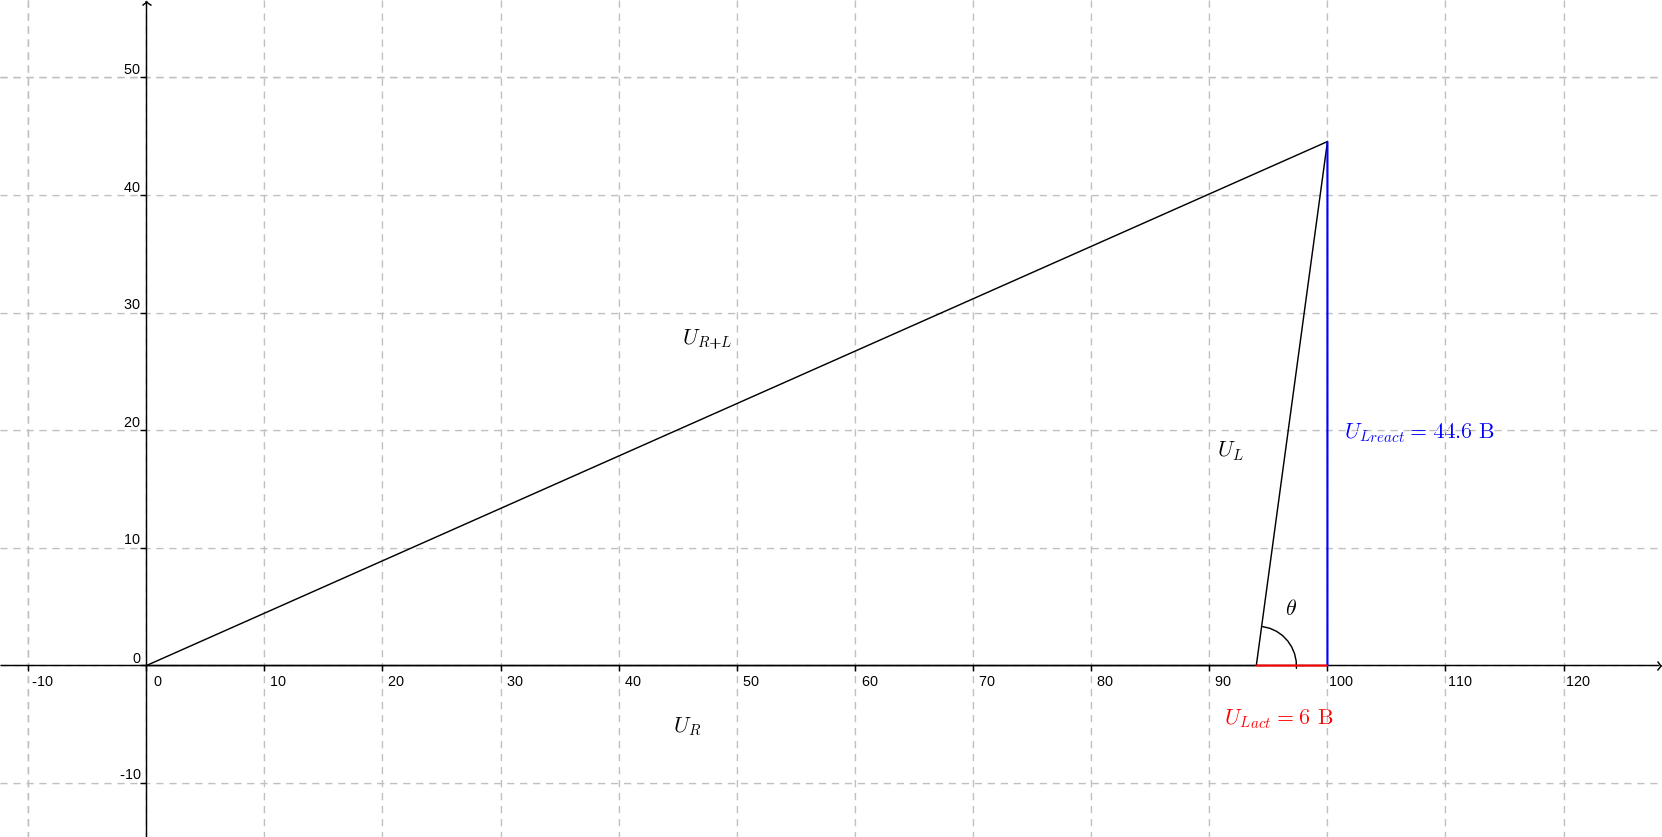

In [11]:
Image('Diagram.png')

Теперь вычислим косинус из диаграммы: $\cos{\theta}=\dfrac{U^2_{L_{act}}}{\sqrt{U^2_{L_{act}}+U^2_{L_{react}}}}=0.13\pm0.01$

Из этого посчитаем мощность: $P_L=IU_L\cos{\theta}=(6.1\pm0.5)\ Вт$

## Выводы

В ходе эксперимента были определены положение резонанса RLC-цепи, рассчитаны параметры цепи несколькими способами. Полученные результаты неплохо согласуются между собой.